# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

# Data Ingestion

In [2]:
# Load dataset
df = pd.read_csv('soil_fertility_betelvine.csv')
df.head()

,pH,Electrical_Conductivity,Organic_Carbon,Available_Nitrogen,Available_Phosphorus,Available_Potassium,Exchangeable_Calcium,Exchangeable_Magnesium,Available_Sulfur,Iron,Manganese,Zinc,Copper,Soil_Depth,Soil_Type,Fit_for_Betel_Vine
0,7.06,0.44,1.01,326,34,197,4.98,1.43,6,13.89,9.89,0.91,0.41,Subsurface,Loamy,Yes
1,7.93,0.40,0.63,340,22,266,4.71,1.58,14,23.50,3.88,0.91,0.35,Subsurface,Sandy,Yes
2,7.60,0.26,0.74,255,32,284,4.54,0.65,14,14.36,8.64,1.32,0.30,Surface,Sandy,No
3,7.40,0.65,0.96,390,17,210,1.63,2.49,16,22.24,6.90,1.89,0.88,Surface,Loamy,Yes
4,6.73,0.53,0.84,269,32,220,2.48,1.26,7,24.04,5.57,0.85,0.20,Surface,Mixed,No


# Data Preprocessing

In [3]:
df.isnull().sum()

pH                         0
Electrical_Conductivity    0
Organic_Carbon             0
Available_Nitrogen         0
Available_Phosphorus       0
Available_Potassium        0
Exchangeable_Calcium       0
Exchangeable_Magnesium     0
Available_Sulfur           0
Iron                       0
Manganese                  0
Zinc                       0
Copper                     0
Soil_Depth                 0
Soil_Type                  0
Fit_for_Betel_Vine         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   pH                       10000 non-null  float64
 1   Electrical_Conductivity  10000 non-null  float64
 2   Organic_Carbon           10000 non-null  float64
 3   Available_Nitrogen       10000 non-null  int64  
 4   Available_Phosphorus     10000 non-null  int64  
 5   Available_Potassium      10000 non-null  int64  
 6   Exchangeable_Calcium     10000 non-null  float64
 7   Exchangeable_Magnesium   10000 non-null  float64
 8   Available_Sulfur         10000 non-null  int64  
 9   Iron                     10000 non-null  float64
 10  Manganese                10000 non-null  float64
 11  Zinc                     10000 non-null  float64
 12  Copper                   10000 non-null  float64
 13  Soil_Depth               10000 non-null  object 
 14  Soil_Type              

In [5]:
# Convert categorical target variable to binary
df["Fit_for_Betel_Vine"] = df["Fit_for_Betel_Vine"].map({"Yes": 1, "No": 0})

# One-Hot Encoding for categorical columns
df = pd.get_dummies(df, columns=["Soil_Depth", "Soil_Type"], drop_first=True)
df.head()

,pH,Electrical_Conductivity,Organic_Carbon,Available_Nitrogen,Available_Phosphorus,Available_Potassium,Exchangeable_Calcium,Exchangeable_Magnesium,Available_Sulfur,Iron,Manganese,Zinc,Copper,Fit_for_Betel_Vine,Soil_Depth_Surface,Soil_Type_Loamy,Soil_Type_Mixed,Soil_Type_Sandy
0,7.06,0.44,1.01,326,34,197,4.98,1.43,6,13.89,9.89,0.91,0.41,1,False,True,False,False
1,7.93,0.40,0.63,340,22,266,4.71,1.58,14,23.50,3.88,0.91,0.35,1,False,False,False,True
2,7.60,0.26,0.74,255,32,284,4.54,0.65,14,14.36,8.64,1.32,0.30,0,True,False,False,True
3,7.40,0.65,0.96,390,17,210,1.63,2.49,16,22.24,6.90,1.89,0.88,1,True,True,False,False
4,6.73,0.53,0.84,269,32,220,2.48,1.26,7,24.04,5.57,0.85,0.20,0,True,False,True,False


# Separating Features and Target Column

In [6]:
X = df.drop(columns=["Fit_for_Betel_Vine"])
y = df["Fit_for_Betel_Vine"]

# Train test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle Class Imbalance using SMOTE 

In [8]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Feature Scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models

In [10]:
models = {
    "Logistic Regression": LogisticRegression(class_weight="balanced"),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, class_weight="balanced"),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced"),
    "XGBoost": XGBClassifier(n_estimators=200, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel='rbf', probability=True, class_weight="balanced"),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(n_estimators=100)
}

# Train and evaluate models

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:20:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


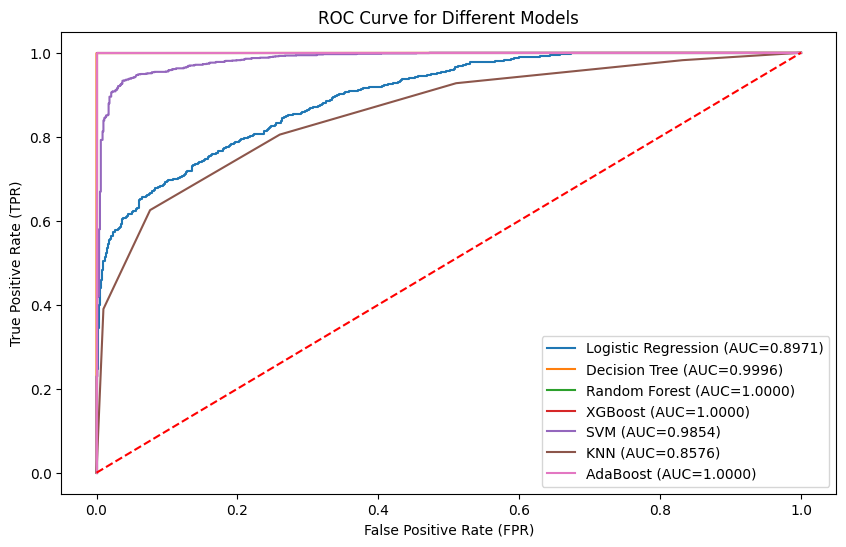

Logistic Regression
Accuracy: 0.7935
Precision: 0.8404
Recall: 0.8042
F1 Score: 0.8219
AUC Score: 0.8971
------------------------------
Decision Tree
Accuracy: 0.9985
Precision: 1.0000
Recall: 0.9975
F1 Score: 0.9987
AUC Score: 0.9996
------------------------------
Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC Score: 1.0000
------------------------------
XGBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC Score: 1.0000
------------------------------
SVM
Accuracy: 0.9440
Precision: 0.9677
Recall: 0.9367
F1 Score: 0.9520
AUC Score: 0.9854
------------------------------
KNN
Accuracy: 0.7785
Precision: 0.8182
Recall: 0.8051
F1 Score: 0.8116
AUC Score: 0.8576
------------------------------
AdaBoost
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC Score: 1.0000
------------------------------


In [11]:
results = {}


plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    results[model_name] = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1, "AUC": auc_score}

    # Plot ROC Curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC={auc_score:.4f})")

# Plot ROC baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve for Different Models")
plt.legend(loc="lower right")
plt.show()

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print(f"AUC Score: {metrics['AUC']:.4f}")
    print("-" * 30)

# Analysis of Updated Results
Decision Tree, Random Forest, XGBoost, and AdaBoost are achieving near-perfect scores (strong overfitting).
Overfitting risk remains, though Decision Tree’s slight dip suggests it may be less overfitted than before.
Solution: Reduce max depth, limit number of estimators, or add regularization.

SVM: 94.40% accuracy, AUC 98.54% → Very strong performance, good generalization.
Logistic Regression: 79.35% accuracy, AUC 89.71% → Consistent but lower than SVM.
K-Nearest Neighbors (KNN): Accuracy dropped to 77.85%, weaker performance than other models.
Likely struggling with feature scaling or high-dimensional data.

## Best Model Choice

✅ Recommended Model: Support Vector Machine (SVM)
Accuracy: 94.40%, AUC: 98.54%
Maintains high precision and recall balance.
Less prone to overfitting than tree-based models.
Works well with feature scaling.

✅ Alternative: Logistic Regression (if Interpretability Matters)
If explainability is a priority, Logistic Regression is still a valid option.
🚨 Avoid Using Overfitted Models (Random Forest, XGBoost, AdaBoost)
Their perfect scores are unrealistic in real-world scenarios.

In [12]:
import pickle

# Save the trained SVM model as a pickle file
filename = 'svm_model_new.pkl'
pickle.dump(models["SVM"], open(filename, 'wb'))

print(f"SVM model saved to {filename}")

SVM model saved to svm_model_new.pkl


In [13]:
# Assuming 'scaler' is the StandardScaler object from your training code
# Create a scaler.pkl file containing the scaler.
scaler = StandardScaler() # Initialize the scaler, replace with your actual scaler if any
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler.fit(X_train) # Fit the scaler to the training data
pickle.dump(scaler, open('scaler_new.pkl', 'wb'))